# Exercício de Casa 🏠 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Parte 1: Preparação do Ambiente**
**Geração de Dados Fictícios:**

In [2]:
# Configurando a seed para reprodutibilidade
np.random.seed(42)

# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

# Criando DataFrame
data = {
    'Data': np.random.choice(datas, num_registros),
    'Categoria': np.random.choice(categorias, num_registros),
    'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
    'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
}
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


### **Parte 2: Consulta e Filtragem de Dados**

**Carregando os dados:**

In [ ]:
df = pd.read_csv('dados_vendas.csv')
df

**Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**

Resposta: O DataFrame tem 365 linhas e 5 colunas.

Função utilizada para verificar foi a: df.shape

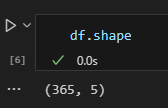


**Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?**

Resposta: Os tipos de dados das colunas são: object(string), int64(inteiros) e float64(decimais).

Função utilizada para verificação  foi a: df.dtypes

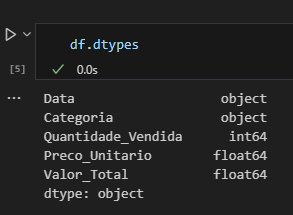


**Exibir as primeiras 5 linhas do DataFrame:**

- A função utilizada foi a: head() que por padrão mostra apenas as 5 primeiras linhas do df.

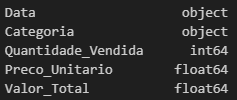

**Pergunta 3: Quantas categorias únicas de produtos estão presentes no DataFrame?**

Resposta: Estão presentes 5 categorias unicas no Dataframe.

Função utilizada: unique() que retorna um array numpy contendo os valores únicos encontrados na coluna.

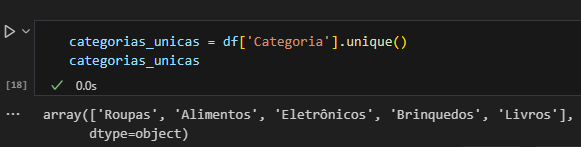

**Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':**

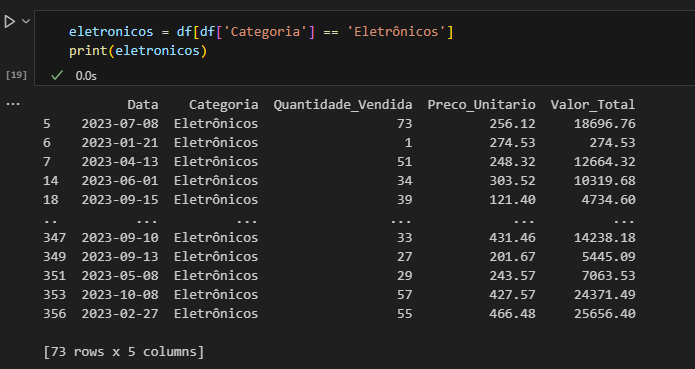

In [ ]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']
eletronicos

**Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**

Foi feito uma filtragem na coluna categoria para pegar apenas os eletronicos para calcular a média de vendas, e para termos a média usa-se a funçã mean().

Resposta: A média total de vendas dos eletrônicos é: 12291.26

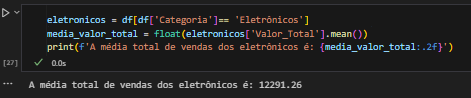


**Filtrar as vendas acima de R$ 1000:**

Para filtar as vendas acima de 1000 é feito o filtro da coluna e usa-se uma condicional, que no caso foi usado o sinal '>'(maior) então filtra os valor que são '>' (maiores que) 1000.
Se fosse de 1000 a diante teriamos que usar o '>=' que significa maior ou igual a 1000.

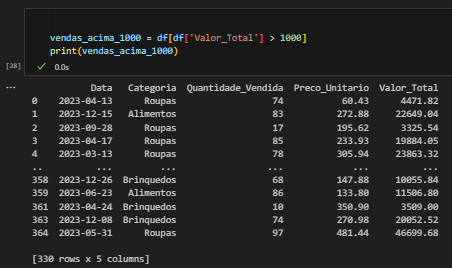

**Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?**

Resposta: Ocorreram 330 compras acima de 1000.

Função utilizada: _len_ ela que mostra todas as vendas que já foram filtradas no código anterior mostram a quantiadade em linhas e colunas.

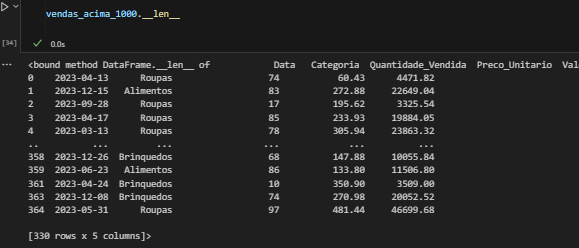



### **Parte 3: Agrupamento e Agregação**



**Agrupar os dados por categoria e calcular o total de vendas por categoria:**

Neste código agrupamos as duas colunas 'Categoria' e 'Valor_Total' para verificarmos o total de vendas por categoria
groupby()- para agrupar, sum() - faz a soma, reset_inex() -para voltar ao índice padrão.

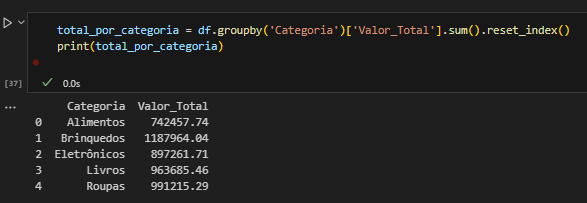




**Pergunta 6: Qual categoria teve o maior valor total de vendas?**

Resposta: a categoria que teve o maior valor de vendas foi "Briquedos"

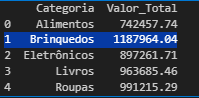



**Calcular a quantidade média vendida por categoria:**

Neste código agrupamos as duas colunas 'Categoria' e 'Quantidade_Vendida' para verificarmos a média vendida por categoria
groupby()- para agrupar, mean() - tira a méida, reset_inex() - para voltar ao índice padrão.

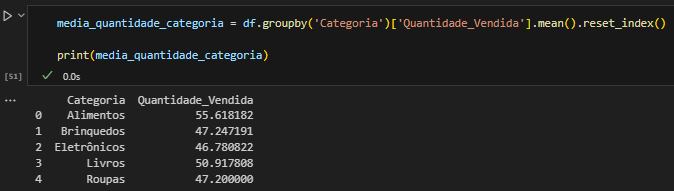
  

In [ ]:
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
total_por_categoria


**Pergunta 7: Qual categoria teve a maior quantidade média vendida?**

Reposta: Os alimentos tiveram a maior média de vendas.

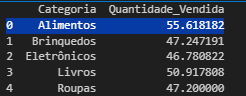

### **Parte 4: Visualização de Dados**


**Criar um gráfico de barras mostrando o total de vendas por categoria:**

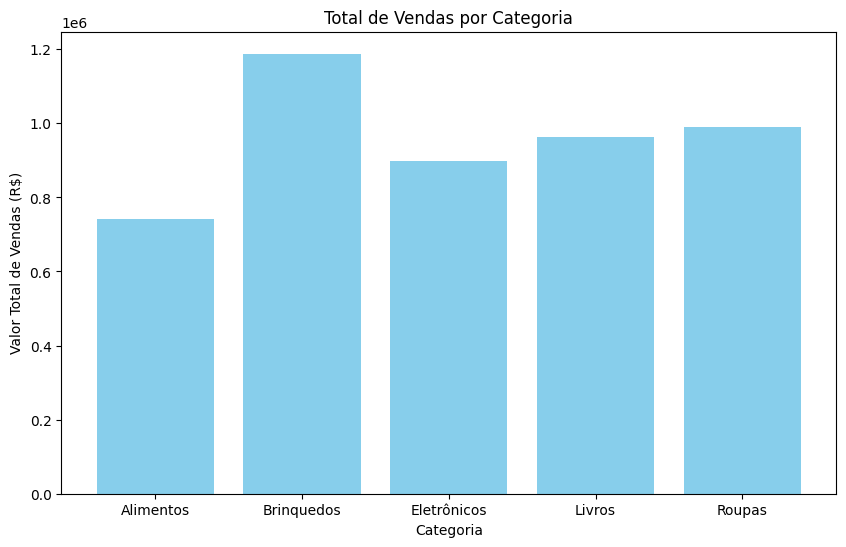

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

**Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?**

Resposta: A categoria que se destaca é a de brinquedos com o maior número de vendas totais.

**Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':**

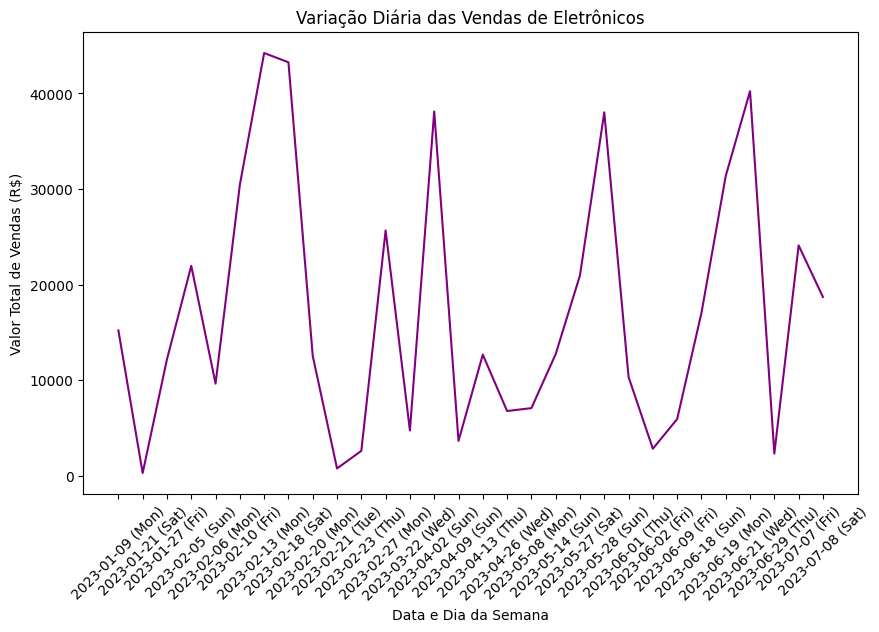

In [8]:
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()
vendas_diarias = vendas_diarias.head(30)

# Criando uma nova coluna 
vendas_diarias['Data_e_Dia'] = vendas_diarias['Data'].dt.strftime('%Y-%m-%d (%a)')

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias.index, vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data e Dia da Semana')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(vendas_diarias.index, vendas_diarias['Data_e_Dia'], rotation=45)
plt.show()

**Pergunta 9: Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?**

Gráfico de 30 dias de vendas.
Analisando gráfico das vendas, consegui observar que em média são feitas 4 vendas mensais de eletronicos
No mês de fevereiro vendeu 2x mais do que o mês de Janiero em valor e 3x mais em quantidade de vendas, mesmo sendo um mês mais curto.
Em Março teve apenas uma venda de eletrônico, porém de valor consideravél, quase atingindo o mesmo valor das vendas de fevereiro .
Em Abril tivemos quase o mesmo número de vendas de Janeiro, porém vendas de produtos com o valor menor ficando assim com o valor total de vendas inferior ao de Janeiro.
Em Maio e Junho manteve-se os valores totais das vendas e quase atingiu o mesmo valor do mês de fevereiro.
Em Julho o valor das vendas teve uma queda de quase 50% do valor comparando com o mês de Fevereiro.
Maioria das vendas de eletrônicos ocorrem aos domingos.

